### Bayesian Exercise Solutions

In [1]:
%matplotlib inline
from numba import jit
import matplotlib.pyplot as plt
import thinkbayes2 as tb
import thinkstats2 as ts
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

### Exercise 1:

Thinkbayes includes an \_add\_ (+) function that enables you to calculate the sum of two PMFs. Please print the histogram of the sum of numbers from two six-sided fair dice and the mean of the two dice.

### Solution

2 0.027777777777777776
3 0.05555555555555555
4 0.08333333333333333
5 0.1111111111111111
6 0.1388888888888889
7 0.16666666666666669
8 0.1388888888888889
9 0.1111111111111111
10 0.08333333333333333
11 0.05555555555555555
12 0.027777777777777776
7.0


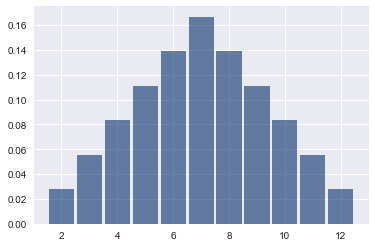

In [10]:
twodice=d6+d6
twodice.Print()
tb.thinkplot.Hist(twodice)
print(twodice.Mean())

### Exercise 2: 

Suppose I tell you that I roll two dice and the outcome of the two rolls is larger than 3. Please plot the histogram of the PMF for the probability distribution conditional on the fact that I observe an outcome larger than 2 and plot the mean of the outcomes ($P(\text{dice sum}|\text{dice sum}>2)$). 

In [11]:
# Solution goes here.

### Solution

We change two of the outcomes to have 0 weight (capturing the conditional portion) and renormalize, then plot. Note, we do not have to change the value for 1 as due to addition of two die it is no longer feasible and has 0 weight automatically.

7.393939393939394


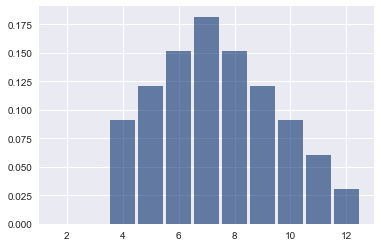

In [12]:
twodice[2]=0
twodice[3]=0
twodice.Normalize() 
tb.thinkplot.Hist(twodice)
print(twodice.Mean())

### Exercise 3

Now suppose we replace the black ball we drew and draw again from the **same bowl**, this time getting a white ball. What is the probability that we drew first a black ball then a white ball from bowl 1? Use thinkbayes and the '\*=' operator to calculate this probability

In [17]:
# Solution goes here.

### Solution

There are two ways to go about this problem, we can do the updates sequentially, treating it as two updates in a row, or a single update. Both ways yield the same solution. For the first method the trick is to realize that the prior for the drawing of the white ball is the posterior from the drawing of the black ball. 

### Solution 1

bowl 1 0.4285714285714286
bowl 2 0.5714285714285714


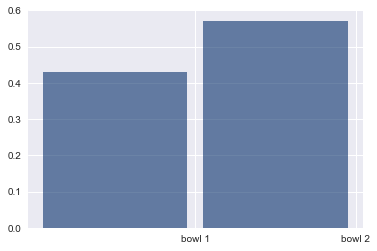

In [18]:
ballsfrombowl['bowl 1']*=(1/4) #probability of white ball from bowl 1
ballsfrombowl['bowl 2']*=(1/2) #probability of white ball from bowl 2
ballsfrombowl.Normalize()
ballsfrombowl.Print()  #posterior values
tb.thinkplot.Hist(ballsfrombowl)

### Solution 2 

In this case we consider the probability of drawing a black ball from bowl 1 and the probability of drawing a black ball and white ball from bowl 2. 

The likelihood with replacement from bowl 1 is $30/40*10/40=300/1600=3/16$.

The likelihood with replacement from bowl 2 is $20/40*20/40=1/4$

We then calculate this directly.

bowl 1 0.42857142857142855
bowl 2 0.5714285714285714


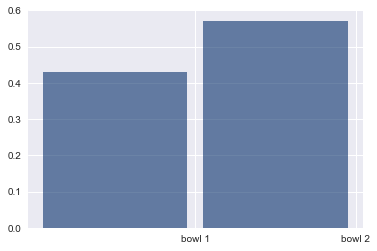

In [19]:
ballsfrombowl2=tb.Pmf(['bowl 1','bowl 2']) #prior
ballsfrombowl2['bowl 1']*=(3/16) #likelihood updating
ballsfrombowl2['bowl 2']*=(1/4) #likelihood updating
ballsfrombowl2.Normalize() #normalizing term in denominator
ballsfrombowl2.Print()
tb.thinkplot.Hist(ballsfrombowl2)

Notice up to some minor floating point rounding error, the results are the same. 

#### Exercise 4:

Fill in the outline for the class below. We want it to compute the likelihood for each die, given a data (observed outcome), and a hypothesis (some known information about the dice).

Once this is filled it, it automatically provides a built in Update function via the Suite. Note that you only need to provide the likelihood. The fairdice will 'inherit' the update method (and some other methods we aren't using) from suite.

The update function is 

```{python3}
def Update(self,data):
    for hypo in self.Values():
        like=self.Likelihood(data,hypo)
        self[hypo] *= like
    
    self.Normalize()
```

In [21]:
class fairdice(tb.Suite):
    # hypo is number of sides on the die
    # data is the outcome
    def Likelihood(self,data,hypo):
    # fill in this
    # HINT: You should check and make sure the data occurs at all given the hypo (# of sides)
        return ...

### Solution:

In [22]:
class Fairdice(tb.Suite):
    def Likelihood(self,data,hypo):
        if data > hypo: 
            return 0
        else:
            return 1/hypo 

Now we create a dice object and update it. 

In [23]:
fairdice=Fairdice([4,6,8,12]) 
fairdice.Update(6) #normalizes and calculates posterior automatically.
fairdice.Print()

4 0.0
6 0.4444444444444445
8 0.33333333333333337
12 0.22222222222222224


We can do even further updates.

In [24]:
for roll in [8,7,7,5,4]:
    fairdice.Update(roll)
fairdice.Print()

4 0.0
6 0.0
8 0.9192938209331653
12 0.08070617906683476


### Exercise 5:

Take the tank problem, but suppose there are first 200, then 1000, then 10000 possibilities. Given the two updates from before, plot the pdfs of these graphs and report the means and medians. What happens in the limit to the median as the number of possibilities goes to infinity? What is thte maximum of the posterior? Is this what you expected?

In [54]:
# solution goes here

Mean: 76.02060701103908
Median: 62


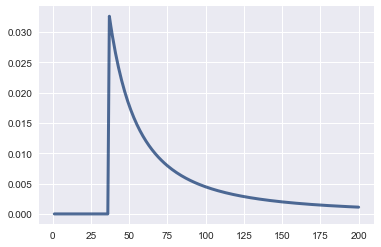

In [28]:
tank=Tank(range(1,201))
tank.Update(13) #normalizes and calculates posterior automatically.
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())

Mean: 125.43210293250182
Median: 70
Mean: 205.63961625384482
Median: 73
Mean: 289.0424981403347
Median: 73
Mean: 373.00005453113096
Median: 73


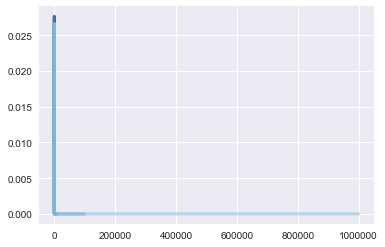

In [29]:
tank=Tank(range(1,1001))
tank.Update(13) #normalizes and calculates posterior automatically.
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())
tank=Tank(range(1,10001))
tank.Update(13) #normalizes and calculates posterior automatically.
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())
tank=Tank(range(1,100001))
tank.Update(13) #normalizes and calculates posterior automatically.
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())
tank=Tank(range(1,1000001))
tank.Update(13) #normalizes and calculates posterior automatically.
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())

Mean is not stable without a different prior. Median goes to $73$, maximum of posterior (MAP) is 37.

### Exercise 6:

Please plot the CDF and the 90% and 95% credible interval for the Tank problem with 1000 possible tanks with the powerlaw prior after observing 13 tanks. How does it compare to the uniform prior case? Why?

In [ ]:
# solution goes here

### Solution

95% credible interval  ( 13 , 336 )
90% credible interval  ( 13 , 202 )


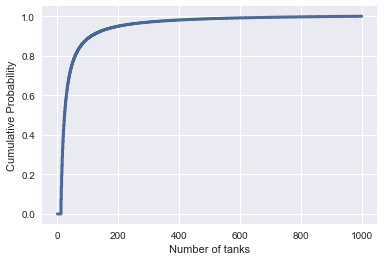

In [52]:
hypos = range(1, 1001)
suite2 = Tank2(hypos)
suite2.Update(13)

print('95% credible interval ','(',suite2.Percentile(2.5),',', suite2.Percentile(97.5),')')
print('90% credible interval ', '(', suite2.Percentile(5),',', suite2.Percentile(95),')')

cdf = tb.Cdf(suite2)
tb.thinkplot.Cdf(cdf)
tb.thinkplot.Config(xlabel='Number of tanks',
                 ylabel='Cumulative Probability',
                 legend=False)

### Exercise 7: 

Try writing out this monte carlo simulation and graphing the result. 

### Solution

Monte carlo π estimate is:  4.0


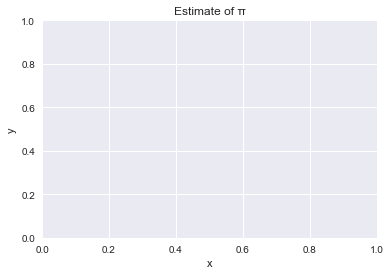

Monte carlo π estimate is:  2.0


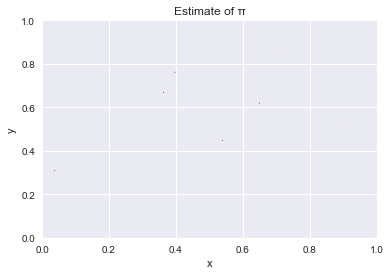

Monte carlo π estimate is:  2.92


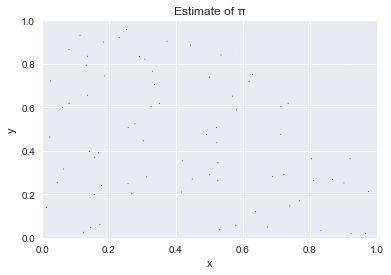

Monte carlo π estimate is:  3.136


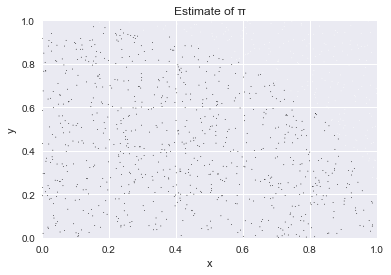

Monte carlo π estimate is:  3.1412


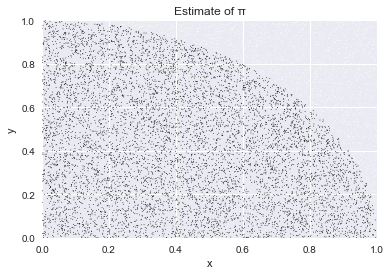

Monte carlo π estimate is:  3.13548


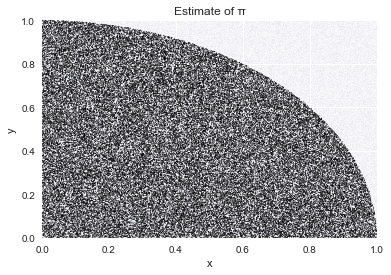

Monte carlo π estimate is:  3.139624


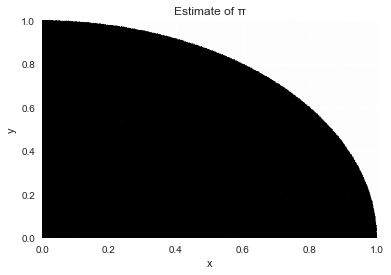

Monte carlo π estimate is:  3.141494
Monte carlo π estimate is:  3.14148476
Monte carlo π estimate is:  3.141716208


In [36]:
## Monte Carlo Estimate of Pi##
power=np.array(10**np.arange(10))
@jit
def monte_carlo_pi(nsize):
    for i in range(len(nsize)):
        draws=np.random.uniform(size=(2,nsize[i]))
        vals = np.zeros(nsize[i])
        vals[draws[0,]**2+draws[1,]**2<=1]=1 #indicator, 1 if inside circle, 0 otherwise.
        print('Monte carlo π estimate is: ', np.sum(vals)/nsize[i]*4) #sample mean
        if (i<7):
            plt.xlim(0,1)
            plt.title('Estimate of π')
            plt.ylabel('y')
            plt.xlabel('x')
            plt.ylim(0,1)
            plt.scatter(draws[0,],draws[1,],c=vals,s=.2)
            plt.show()
monte_carlo_pi(power)

The Monte Carlo method is useful for Bayesian statistics, because oftentimes it can be difficult to analytically find the posterior. 

In those cases, we can use Monte Carlo to simulate what the distribution looks like. You will see an example of this on your homework.